In [41]:
# imports needed
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image

In [42]:
# create the image classification

classification = ['Heart', 'Oblong', 'Oval', 'Round', 'Square']

In [94]:
# load the data

# training data

x_train_list = []
y_train_list = []

for i in range(1000):
    # for heart shape
    try:
        tempImage = image.load_img('FaceShape Dataset/training_set/Heart/heart (' + str(i+1) +').jpg', target_size=(128, 128))
        data = image.img_to_array(tempImage, dtype=int)
        x_train_list.append(data)
        y_train_list.append(0)
    except:
        continue
    
    # for oblong shape
    try:
        tempImage = image.load_img('FaceShape Dataset/training_set/Oblong/oblong (' + str(i+1) +').jpg', target_size=(128, 128))
        data = image.img_to_array(tempImage, dtype=int)
        x_train_list.append(data)
        y_train_list.append(1)
    except:
        continue
    
    # for oval shape
    try:
        tempImage = image.load_img('FaceShape Dataset/training_set/Oval/oval (' + str(i+1) +').jpg', target_size=(128, 128))
        data = image.img_to_array(tempImage, dtype=int)
        x_train_list.append(data)
        y_train_list.append(2)
    except:
        continue
        
    # for round shape
    try:
        tempImage = image.load_img('FaceShape Dataset/training_set/Round/round (' + str(i+1) +').jpg', target_size=(128, 128))
        data = image.img_to_array(tempImage, dtype=int)
        x_train_list.append(data)
        y_train_list.append(3)
    except:
        continue
        
    # for square shape
    try:
        tempImage = image.load_img('FaceShape Dataset/training_set/Square/square (' + str(i+1) +').jpg', target_size=(128, 128))
        data = image.img_to_array(tempImage, dtype=int)
        x_train_list.append(data)
        y_train_list.append(4)
    except:
        continue 
        
        
x_train = np.array(x_train_list)
y_train = np.array(y_train_list)

In [95]:
# load the data

# test data

x_test_list = []
y_test_list = []

for i in range(1000):
    # for heart shape
    try:
        tempImage = image.load_img('FaceShape Dataset/testing_set/Heart/heart (' + str(i+1) +').jpg', target_size=(128, 128))
        data = image.img_to_array(tempImage, dtype=int)
        x_test_list.append(data)
        y_test_list.append(0)
    except:
        continue
    
    # for oblong shape
    try:
        tempImage = image.load_img('FaceShape Dataset/testing_set/Oblong/oblong (' + str(i+1) +').jpg', target_size=(128, 128))
        data = image.img_to_array(tempImage, dtype=int)
        x_test_list.append(data)
        y_test_list.append(1)
    except:
        continue
    
    # for oval shape
    try:
        tempImage = image.load_img('FaceShape Dataset/testing_set/Oval/oval (' + str(i+1) +').jpg', target_size=(128, 128))
        data = image.img_to_array(tempImage, dtype=int)
        x_test_list.append(data)
        y_test_list.append(2)
    except:
        continue
        
    # for round shape
    try:
        tempImage = image.load_img('FaceShape Dataset/testing_set/Round/round (' + str(i+1) +').jpg', target_size=(128, 128))
        data = image.img_to_array(tempImage, dtype=int)
        x_test_list.append(data)
        y_test_list.append(3)
    except:
        continue
        
    # for square shape
    try:
        tempImage = image.load_img('FaceShape Dataset/testing_set/Square/square (' + str(i+1) +').jpg', target_size=(128, 128))
        data = image.img_to_array(tempImage, dtype=int)
        x_test_list.append(data)
        y_test_list.append(4)
    except:
        continue 
        
        
x_test = np.array(x_test_list)
y_test = np.array(y_test_list)

In [153]:
# convert lables into a set of 5 numbers to input into the neural network
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [97]:
# normalize the pixels to be values between 0 and 1
x_train = x_train / 255
x_test = x_test / 255

In [163]:
# create the models architecture
model = Sequential()

# add the first convolution layer
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(128, 128, 3)))

# add a pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# add a second convolution layer
model.add(Conv2D(32, (5, 5), activation='relu'))

# add another pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# add a second convolution layer
model.add(Conv2D(32, (5, 5), activation='relu'))

# add another pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# add a second convolution layer
model.add(Conv2D(32, (5, 5), activation='relu'))

# add another pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# add a flattening layer
model.add(Flatten())

# add a layer with 2000 neurons
model.add(Dense(2000, activation='relu'))

# add a drop out layer (with 50% drop out rate)
model.add(Dropout(0.5))

# add a layer with 1000 neurons
model.add(Dense(1000, activation='relu'))

# add a drop out layer (with 50% drop out rate)
model.add(Dropout(0.5))

# add a layer with 500 neurons
model.add(Dense(500, activation='relu'))

# add a drop out layer (with 50% drop out rate)
model.add(Dropout(0.5))

# add a layer with 250 neurons
model.add(Dense(250, activation='relu'))

# add a layer with 5 neurons
model.add(Dense(5, activation='softmax'))

In [164]:
# complie the model
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [165]:
# train the model
hist = model.fit(x_train, y_train_one_hot,
                 batch_size = 256,
                 epochs = 8,
                 validation_split = 0.2)

Epoch 1/8
9/9 [==============================] - 27s 3s/step - loss: 1.5765 - accuracy: 0.2620 - val_loss: 1.5754 - val_accuracy: 0.2089
Epoch 2/8
9/9 [==============================] - 30s 3s/step - loss: 1.5671 - accuracy: 0.2907 - val_loss: 1.6025 - val_accuracy: 0.2939
Epoch 3/8
9/9 [==============================] - 30s 3s/step - loss: 1.5691 - accuracy: 0.2957 - val_loss: 1.5705 - val_accuracy: 0.2939
Epoch 4/8
9/9 [==============================] - 31s 3s/step - loss: 1.5678 - accuracy: 0.2916 - val_loss: 1.5711 - val_accuracy: 0.2939
Epoch 5/8
9/9 [==============================] - 30s 3s/step - loss: 1.5512 - accuracy: 0.2976 - val_loss: 1.5665 - val_accuracy: 0.2939
Epoch 6/8
9/9 [==============================] - 30s 3s/step - loss: 1.5451 - accuracy: 0.2976 - val_loss: 1.5536 - val_accuracy: 0.2939
Epoch 7/8
9/9 [==============================] - 31s 3s/step - loss: 1.5320 - accuracy: 0.2870 - val_loss: 1.5357 - val_accuracy: 0.2939
Epoch 8/8
9/9 [==========================

In [166]:
# evaluate the model using the test data set
model.evaluate(x_test, y_test_one_hot)[1]

8/8 [==============================] - 1s 113ms/step - loss: 1.1984 - accuracy: 0.8130


0.8130081295967102

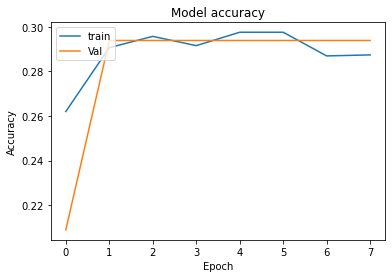

In [167]:
# visualize the models accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'Val'], loc='upper left')
plt.show()

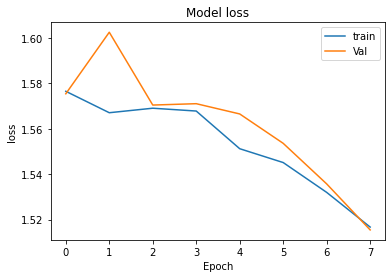

In [168]:
# visualize the models loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['train', 'Val'], loc='upper right')
plt.show()

In [169]:
# use joblib to export model

model.save('mlmodel(81).h5')

In [152]:
# import joblib

# joblib.dump(model,'mlmodel_test.h5')